# Regression with Linear Regression, Random Forest, and KNN Regression
# Using California Housing Prices

In [1]:
# Regression with Linear Regression, Random Forest, and KNN Regression
# Using California Housing Prices
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# For better plot aesthetics
sns.set(style="whitegrid", context="talk")

In [23]:
# 2. Diabetes Dataset (smaller regression dataset for comparison)
diabetes = load_diabetes(as_frame=True)
X_diabetes, y_diabetes = diabetes.data, diabetes.target

print(diabetes.DESCR)
print("Diabetes dataset shape:", X_diabetes.shape)

# Split Diabetes data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_diabetes, y_diabetes, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee


Results for LINEAR REGRESSION
R² on training set: 0.5279
R² on test set    : 0.4526
MSE on test set   : 2900.1936
MAE on test set   : 42.7941
Interpretation:
- R² closer to 1 means better fit.
- MSE penalizes larger errors heavily.
- MAE gives an average absolute error (easier to interpret).


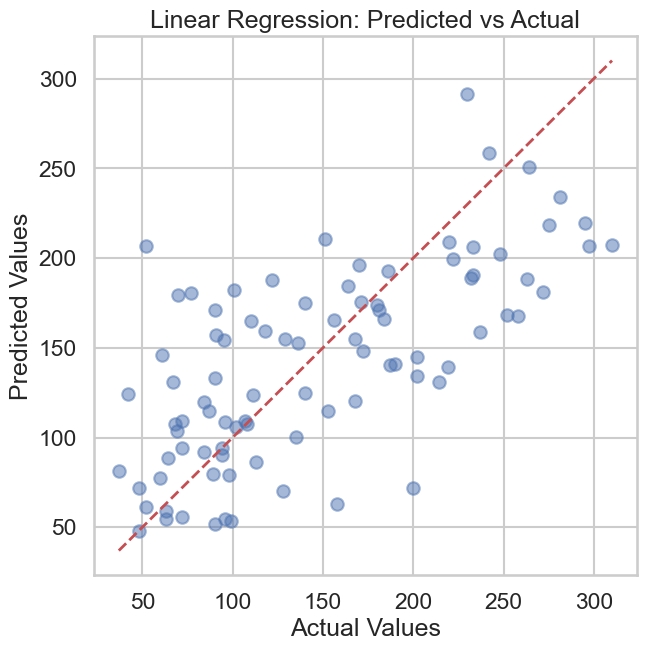

In [27]:
# ==============================================================
# LINEAR REGRESSION
# ==============================================================
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)

# Predictions
y_pred_train_lin = lin_reg.predict(X_train)
y_pred_test_lin = lin_reg.predict(X_test)

# Metrics
lin_train_r2 = r2_score(y_train, y_pred_train_lin)
lin_test_r2 = r2_score(y_test, y_pred_test_lin)
lin_test_mse = mean_squared_error(y_test, y_pred_test_lin)
lin_test_mae = mean_absolute_error(y_test, y_pred_test_lin)

print("\n==============================")
print("Results for LINEAR REGRESSION")
print("==============================")
print(f"R² on training set: {lin_train_r2:.4f}")
print(f"R² on test set    : {lin_test_r2:.4f}")
print(f"MSE on test set   : {lin_test_mse:.4f}")
print(f"MAE on test set   : {lin_test_mae:.4f}")
print("Interpretation:")
print("- R² closer to 1 means better fit.")
print("- MSE penalizes larger errors heavily.")
print("- MAE gives an average absolute error (easier to interpret).")

# Plot predicted vs actual
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_test_lin, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Predicted vs Actual")
plt.show()


Results for KNN REGRESSION
R² on training set: 0.5839
R² on test set    : 0.4302
MSE on test set   : 3019.0755
MAE on test set   : 42.7708
Interpretation:
- KNN regression predicts by averaging neighbors.
- Sensitive to local patterns and scaling of features.


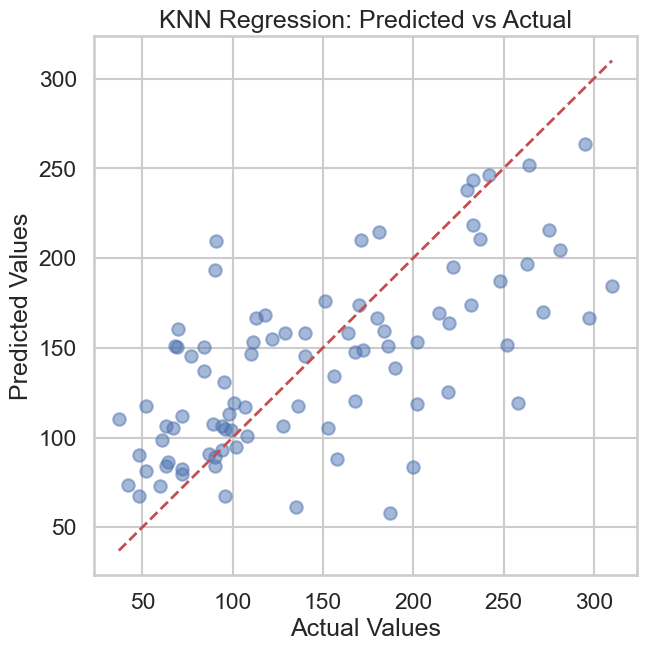

In [12]:
# ==============================================================
# K-NEAREST NEIGHBORS REGRESSION
# ==============================================================
knn_reg = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_reg.fit(X_train, y_train)

# Predictions
y_pred_train_knn = knn_reg.predict(X_train)
y_pred_test_knn = knn_reg.predict(X_test)

# Metrics
knn_train_r2 = r2_score(y_train, y_pred_train_knn)
knn_test_r2 = r2_score(y_test, y_pred_test_knn)
knn_test_mse = mean_squared_error(y_test, y_pred_test_knn)
knn_test_mae = mean_absolute_error(y_test, y_pred_test_knn)

print("\n==============================")
print("Results for KNN REGRESSION")
print("==============================")
print(f"R² on training set: {knn_train_r2:.4f}")
print(f"R² on test set    : {knn_test_r2:.4f}")
print(f"MSE on test set   : {knn_test_mse:.4f}")
print(f"MAE on test set   : {knn_test_mae:.4f}")
print("Interpretation:")
print("- KNN regression predicts by averaging neighbors.")
print("- Sensitive to local patterns and scaling of features.")

# Plot predicted vs actual
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_test_knn, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("KNN Regression: Predicted vs Actual")
plt.show()


Results for RANDOM FOREST
R² on training set: 0.9242
R² on test set    : 0.4428
MSE on test set   : 2952.0106
MAE on test set   : 44.0530
Interpretation:
- Random Forests can capture nonlinear relationships.
- Check difference between train and test R² for overfitting.
- Compare MSE vs MAE to see outlier sensitivity.


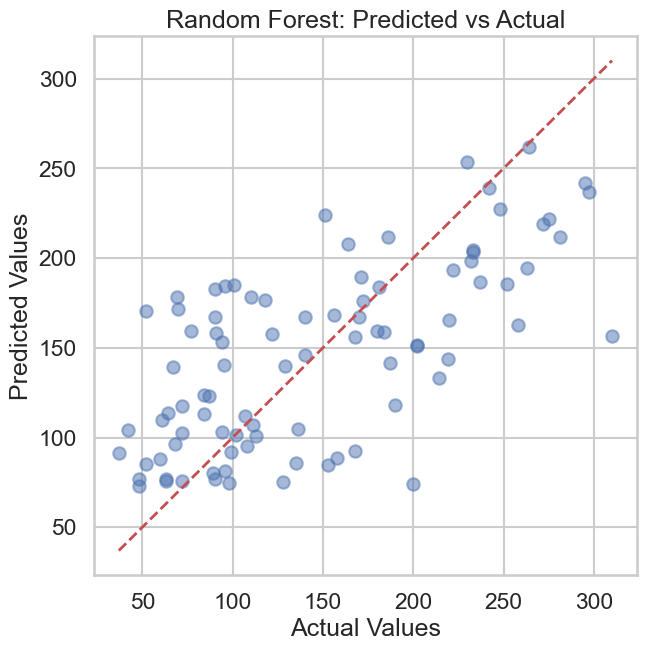

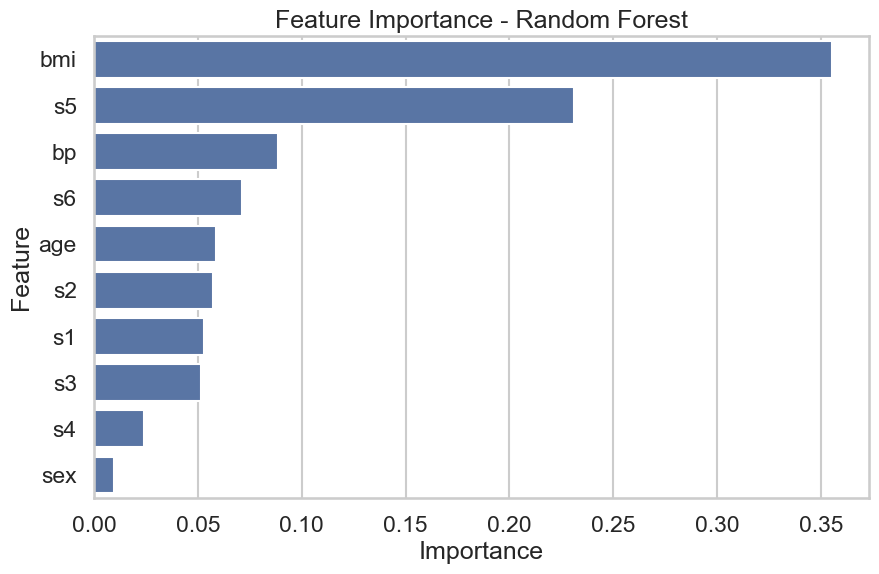

In [15]:
# ==============================================================
# RANDOM FOREST REGRESSION
# ==============================================================
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_reg.fit(X_train, y_train)

# Predictions
y_pred_train_rf = rf_reg.predict(X_train)
y_pred_test_rf = rf_reg.predict(X_test)

# Metrics
rf_train_r2 = r2_score(y_train, y_pred_train_rf)
rf_test_r2 = r2_score(y_test, y_pred_test_rf)
rf_test_mse = mean_squared_error(y_test, y_pred_test_rf)
rf_test_mae = mean_absolute_error(y_test, y_pred_test_rf)

print("\n==============================")
print("Results for RANDOM FOREST")
print("==============================")
print(f"R² on training set: {rf_train_r2:.4f}")
print(f"R² on test set    : {rf_test_r2:.4f}")
print(f"MSE on test set   : {rf_test_mse:.4f}")
print(f"MAE on test set   : {rf_test_mae:.4f}")
print("Interpretation:")
print("- Random Forests can capture nonlinear relationships.")
print("- Check difference between train and test R² for overfitting.")
print("- Compare MSE vs MAE to see outlier sensitivity.")

# Plot predicted vs actual
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_test_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Predicted vs Actual")
plt.show()

# Feature importance
importances = rf_reg.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

## California Housing 

![California Housing](https://storage.googleapis.com/kaggle-datasets-images/24824/31630/a5f5ce1e4b4066d1f222e79e8286f077/dataset-cover.jpg?t=2018-05-03-00-52-48)

In [29]:
# 2. Diabetes Dataset (smaller regression dataset for comparison)
california = fetch_california_housing(as_frame=True)
X_california, y_california = california.data, california.target

print(california.data.head())

# Target - real 0.15 - 5.

print(california.DESCR)
print("California Housing dataset shape:", X_california.shape)

# Split California housing data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_california, y_california, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per


Results for LINEAR REGRESSION
R² on training set: 0.6126
R² on test set    : 0.5758
MSE on test set   : 0.5559
MAE on test set   : 0.5332
Interpretation:
- R² closer to 1 means better fit.
- MSE penalizes larger errors heavily.
- MAE gives an average absolute error (easier to interpret).


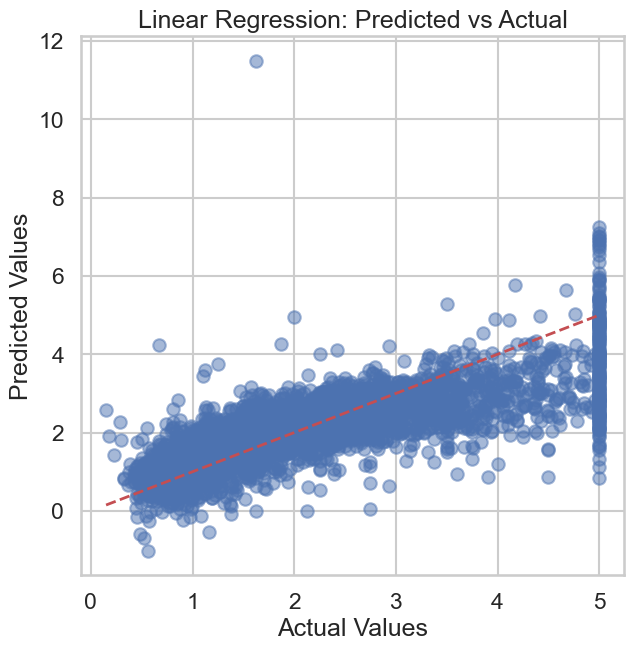

In [30]:
# ==============================================================
# LINEAR REGRESSION
# ==============================================================
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)

# Predictions
y_pred_train_lin = lin_reg.predict(X_train)
y_pred_test_lin = lin_reg.predict(X_test)

# Metrics
lin_train_r2 = r2_score(y_train, y_pred_train_lin)
lin_test_r2 = r2_score(y_test, y_pred_test_lin)
lin_test_mse = mean_squared_error(y_test, y_pred_test_lin)
lin_test_mae = mean_absolute_error(y_test, y_pred_test_lin)

print("\n==============================")
print("Results for LINEAR REGRESSION")
print("==============================")
print(f"R² on training set: {lin_train_r2:.4f}")
print(f"R² on test set    : {lin_test_r2:.4f}")
print(f"MSE on test set   : {lin_test_mse:.4f}")
print(f"MAE on test set   : {lin_test_mae:.4f}")
print("Interpretation:")
print("- R² closer to 1 means better fit.")
print("- MSE penalizes larger errors heavily.")
print("- MAE gives an average absolute error (easier to interpret).")

# Plot predicted vs actual
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_test_lin, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Predicted vs Actual")
plt.show()


Results for KNN REGRESSION
R² on training set: 0.4529
R² on test set    : 0.1463
MSE on test set   : 1.1187
MAE on test set   : 0.8128
Interpretation:
- KNN regression predicts by averaging neighbors.
- Sensitive to local patterns and scaling of features.


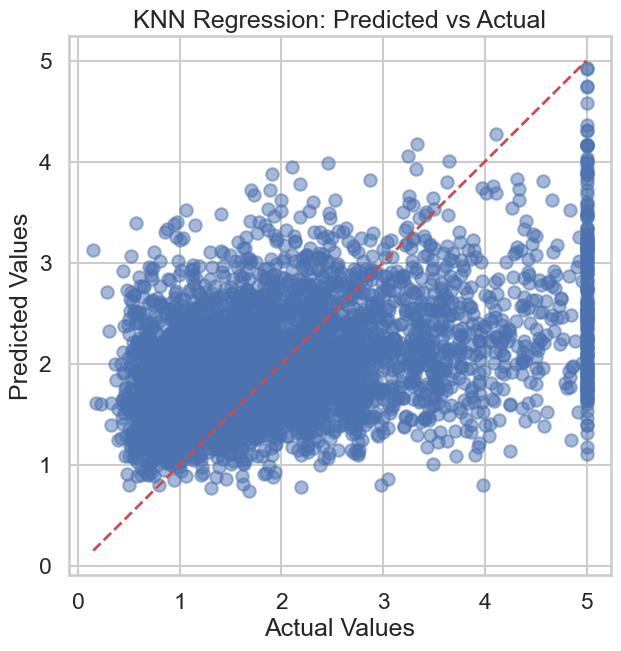

In [31]:
# ==============================================================
# K-NEAREST NEIGHBORS REGRESSION
# ==============================================================
knn_reg = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_reg.fit(X_train, y_train)

# Predictions
y_pred_train_knn = knn_reg.predict(X_train)
y_pred_test_knn = knn_reg.predict(X_test)

# Metrics
knn_train_r2 = r2_score(y_train, y_pred_train_knn)
knn_test_r2 = r2_score(y_test, y_pred_test_knn)
knn_test_mse = mean_squared_error(y_test, y_pred_test_knn)
knn_test_mae = mean_absolute_error(y_test, y_pred_test_knn)

print("\n==============================")
print("Results for KNN REGRESSION")
print("==============================")
print(f"R² on training set: {knn_train_r2:.4f}")
print(f"R² on test set    : {knn_test_r2:.4f}")
print(f"MSE on test set   : {knn_test_mse:.4f}")
print(f"MAE on test set   : {knn_test_mae:.4f}")
print("Interpretation:")
print("- KNN regression predicts by averaging neighbors.")
print("- Sensitive to local patterns and scaling of features.")

# Plot predicted vs actual
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_test_knn, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("KNN Regression: Predicted vs Actual")
plt.show()


Results for RANDOM FOREST
R² on training set: 0.9736
R² on test set    : 0.8051
MSE on test set   : 0.2554
MAE on test set   : 0.3275
Interpretation:
- Random Forests can capture nonlinear relationships.
- Check difference between train and test R² for overfitting.
- Compare MSE vs MAE to see outlier sensitivity.


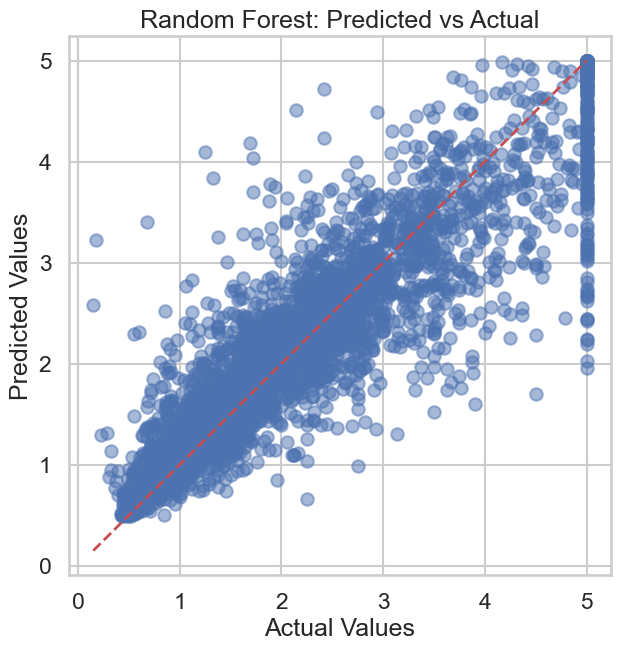

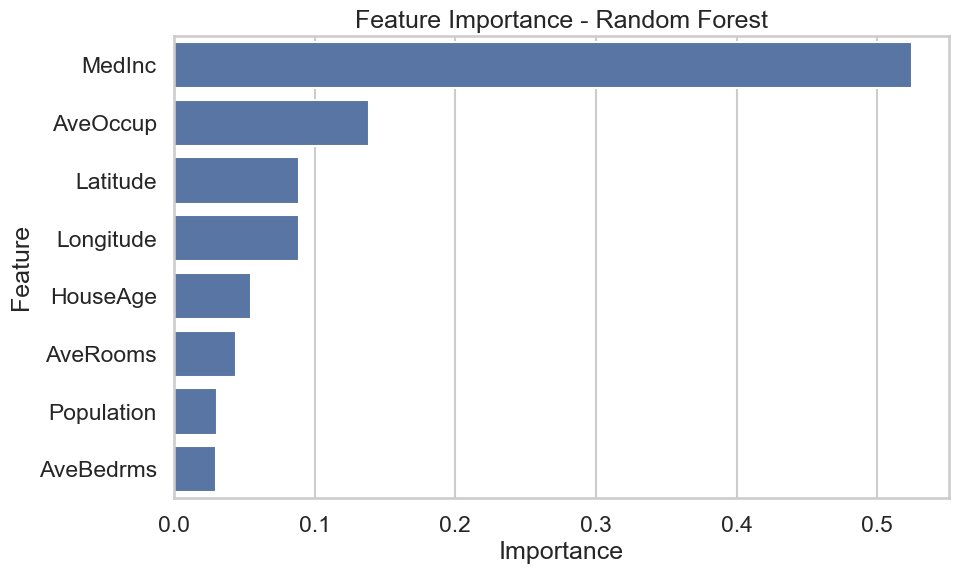

In [32]:
# ==============================================================
# RANDOM FOREST REGRESSION
# ==============================================================
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_reg.fit(X_train, y_train)

# Predictions
y_pred_train_rf = rf_reg.predict(X_train)
y_pred_test_rf = rf_reg.predict(X_test)

# Metrics
rf_train_r2 = r2_score(y_train, y_pred_train_rf)
rf_test_r2 = r2_score(y_test, y_pred_test_rf)
rf_test_mse = mean_squared_error(y_test, y_pred_test_rf)
rf_test_mae = mean_absolute_error(y_test, y_pred_test_rf)

print("\n==============================")
print("Results for RANDOM FOREST")
print("==============================")
print(f"R² on training set: {rf_train_r2:.4f}")
print(f"R² on test set    : {rf_test_r2:.4f}")
print(f"MSE on test set   : {rf_test_mse:.4f}")
print(f"MAE on test set   : {rf_test_mae:.4f}")
print("Interpretation:")
print("- Random Forests can capture nonlinear relationships.")
print("- Check difference between train and test R² for overfitting.")
print("- Compare MSE vs MAE to see outlier sensitivity.")

# Plot predicted vs actual
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_test_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Predicted vs Actual")
plt.show()

# Feature importance
importances = rf_reg.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()